In [44]:
import pandas as pd

In [45]:
#Reading csv file and making copy of that .
file = pd.read_csv("D:\\datasets\\Language_detection\\Language Detection.csv")
df = file.copy()
df.sample(10)

,Text,Language
9054,في حادثة سيرة جون سيجنثالر، قدم محرر مجهول معل...,Arabic
7172,][14] Le voci di Wikipedia sono spesso citate ...,Italian
4991,[126]​ Muchos artículos son revertidos o inclu...,Spanish
4785,"was erg bang, maak je geen zorgen mijn liefste...",Dutch
1989,"[3] जुलाई 2008 को, पांच सबसे बड़े भाषा संस्करण...",Hindi
2105,[58] பல்வேறு சோதனை ஓட்டங்கள் மற்றும் கலந்துரைய...,Tamil
5612,Pensé que te gustaban las cosas elegantes.,Spanish
1975,"നാർസിസ ആദ്യം പാടുപെട്ട വഴികൾ മാറ്റി, പക്ഷേ പതു...",Malayalam
8680,du frågar vad du har gjort så vad som hände i ...,Sweedish
2687,Embora nas várias edições de idiomas sejam man...,Portugeese


In [46]:
#Getting informantion of file .
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [47]:
#Importing needed modules .
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
#Creating an instance of 'LabelEncoder' object .
encoder = LabelEncoder()

In [48]:
#Creating a function to remove stop words from each text .
def Filter(text)->str :
    '''function docstring'''
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    temp = ''
    text = text.lower()
    for word in text.split() :
        if word not in stopwords :
            temp += word
            temp += ' '
    return temp[:-1]

In [49]:
#Spliting our data to features and labels .
features = [Filter(text) for text in df.Text]
lbl = to_categorical(encoder.fit_transform(df.Language))

In [131]:
#Tokenizing texts and transfering them to a matrix .
tokenizer = Tokenizer(oov_token='<00U00>')
tokenizer.fit_on_texts(features)
sequnces = tokenizer.texts_to_sequences(features)
matrix = pad_sequences(sequnces,padding='post',truncating='post',maxlen=18)

In [132]:
#Splitting features and labels to train and valid sets .
idx = (int(input('Enter train size :')) * len(matrix)) // 100
ready_x = matrix[:idx]
lbl_x = lbl[:idx]
ready_y = matrix[idx:]
lbl_y = lbl[idx:]
print(ready_x.shape)
print(ready_y.shape)
print(lbl_x.shape)
print(lbl_y.shape)

Enter train size :99
(10233, 18)
(104, 18)
(10233, 17)
(104, 17)


In [133]:
#creating model by a function .
from tensorflow.keras import models , layers
from tensorflow.keras.optimizers import Adam
def Create_model() :
    '''function docstring'''
    model = models.Sequential([layers.Embedding(len(tokenizer.word_index)+1,17,input_length=18)
                              #,layers.GlobalAveragePooling1D()
                              ,layers.Flatten()
                              ,layers.Dense(50,activation='relu')
                              ,layers.Dropout(0.2)
                              ,layers.Dense(17,activation='softmax')])
    model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [137]:
#datas training .
history = Create_model().fit(ready_x,lbl_x,epochs=10,validation_data=(ready_y,lbl_y))

Epoch 1/10
320/320 [==============================] - 5s 15ms/step - loss: 2.3468 - accuracy: 0.2843 - val_loss: 2.6797 - val_accuracy: 0.0192
Epoch 2/10
320/320 [==============================] - 4s 13ms/step - loss: 0.6420 - accuracy: 0.8713 - val_loss: 0.8392 - val_accuracy: 0.8750
Epoch 3/10
320/320 [==============================] - 5s 16ms/step - loss: 0.1808 - accuracy: 0.9670 - val_loss: 0.4462 - val_accuracy: 0.9135
Epoch 4/10
320/320 [==============================] - 5s 17ms/step - loss: 0.0874 - accuracy: 0.9857 - val_loss: 0.3518 - val_accuracy: 0.9231
Epoch 5/10
320/320 [==============================] - 5s 15ms/step - loss: 0.0447 - accuracy: 0.9955 - val_loss: 0.3059 - val_accuracy: 0.9135
Epoch 6/10
320/320 [==============================] - 5s 17ms/step - loss: 0.0273 - accuracy: 0.9972 - val_loss: 0.2945 - val_accuracy: 0.9231
Epoch 7/10
320/320 [==============================] - 5s 17ms/step - loss: 0.0176 - accuracy: 0.9981 - val_loss: 0.2734 - val_accuracy: 0.9135

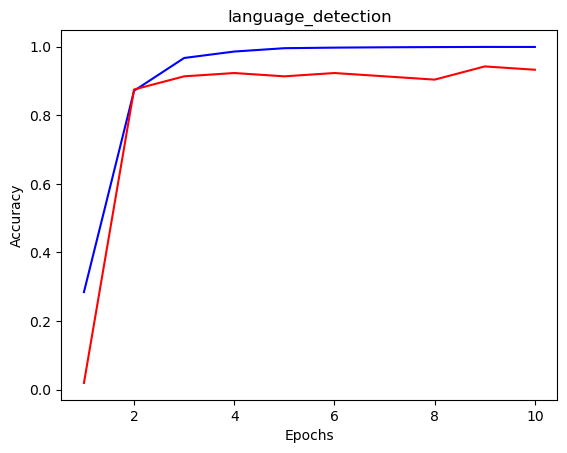

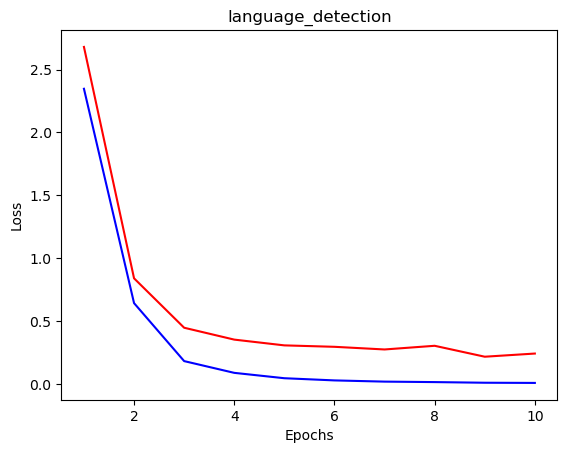

In [139]:
#Visualize models performance
import matplotlib.pyplot as plt
epoch = range(1,11)
results = history.history
plt.plot(epoch,results['accuracy'],'blue')
plt.plot(epoch,results['val_accuracy'],'red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('language_detection')
plt.show()
plt.plot(epoch,results['loss'],'blue')
plt.plot(epoch,results['val_loss'],'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('language_detection')
plt.show()